# Segmentação de clientes de um supermercado

Um supermercado, através de cartões de fidelidade, possui alguns dados básicos sobre seus clientes, como idade, gênero, renda anual e pontuação de gastos. Tal pontuação é algo que o supermercado atribui ao cliente com base em parâmetros definidos, como comportamento do cliente e dados de compra.

O objetivo deste projeto é segmentar os clientes com base em seus dados de compra, para que o supermercado possa entender melhor os clientes e formular estratégias de negócios de acordo.

Link original para o dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Estrutura de pastas do projeto:

```bash
├── README.md
├── dados
│   ├── Mall_Customers.csv
├── notebooks
│   └── projeto_supermercado_01_eda.ipynb
│   └── ...
├── reports
│   └── ...
```

In [4]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version

bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")


Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |     3.10.0
NumPy                |     1.26.4
Pandas               |      2.2.2
Scikit-Learn         |      1.4.2
Seaborn              |     0.13.2

Versão do Python: 3.12.3


In [5]:
DADOS=  "../dados/Mall_Customers.csv"

df = pd.read_csv(DADOS)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
with pd.option_context("display.float_format", "{:.2f}".format):
    display(df.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [9]:
df.describe(exclude="number")

,Gender
count,200
unique,2
top,Female
freq,112


In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)

profile.to_file("../reports/eda_supermercado.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Análise Inicial com YData Profiling

Na análise inicial utilizando o YData Profiling, foram identificados **cinco clusters distintos**. Notamos correlações significativas entre:

- **Idade e Score**
- **Idade e Renda Anual**

### Principais Observações

1. **Correlação entre Idade e Score**: Observamos que, à medida que a idade aumenta, o score tende a diminuir. Os clientes com scores mais altos estão na faixa etária de **30 a 40 anos**, possivelmente devido à maior estabilidade financeira alcançada nessa fase da vida.
2. **Correlação entre Idade e Renda Anual**: Também existe uma correlação significativa entre idade e renda anual, influenciando os scores de crédito dos clientes.

Essas observações são fundamentais para entender o perfil dos clientes e traçar estratégias de segmentação e marketing mais eficazes.


In [12]:
df_analise = df.copy()
df_analise = df_analise.drop("CustomerID", axis=1)

df_analise.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Visualização de Dados Utilizando Diversos Gráficos

Abaixo, vamos utilizar os seguintes gráficos para conseguir visualizar melhor a distribuição dos clusters e identificar outras possíveis outras possíveis correlações e sobreposições.



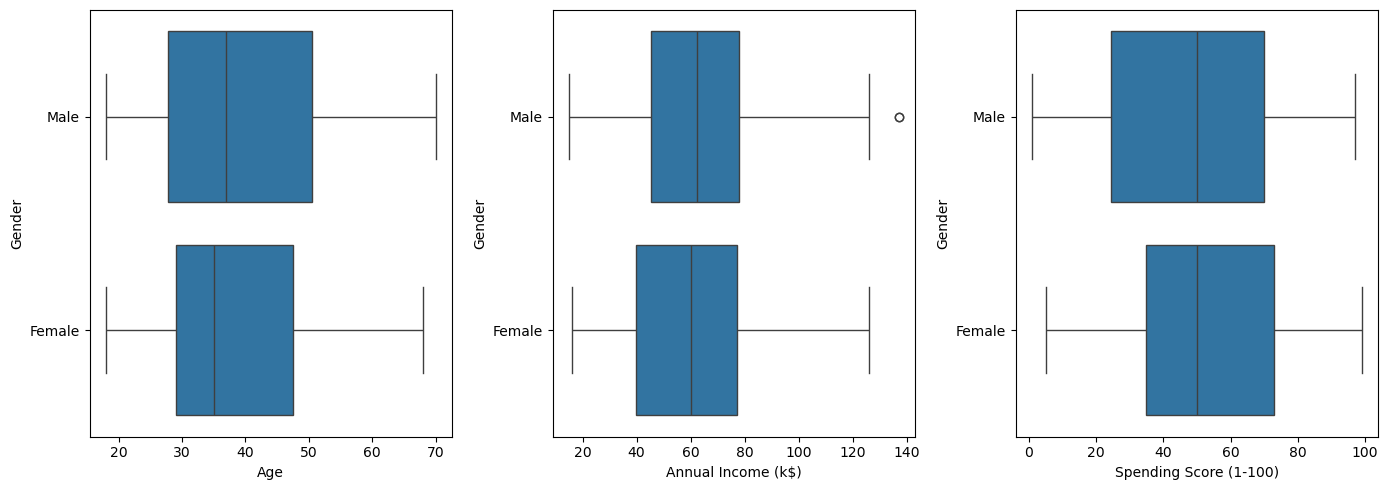

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14,5), tight_layout=True)

for ax, col in zip (axs, df_analise.select_dtypes("number")):
    sns.boxplot(data=df_analise, x=col, y="Gender", ax=ax)

plt.show()

In [14]:
df_analise.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [15]:
with pd.option_context("display.float_format", "{:.3f}".format):
    display(df_analise.corr(numeric_only=True, method="spearman"))

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000,0.020,-0.345
Annual Income (k$),0.020,1.000,0.008
Spending Score (1-100),-0.345,0.008,1.000


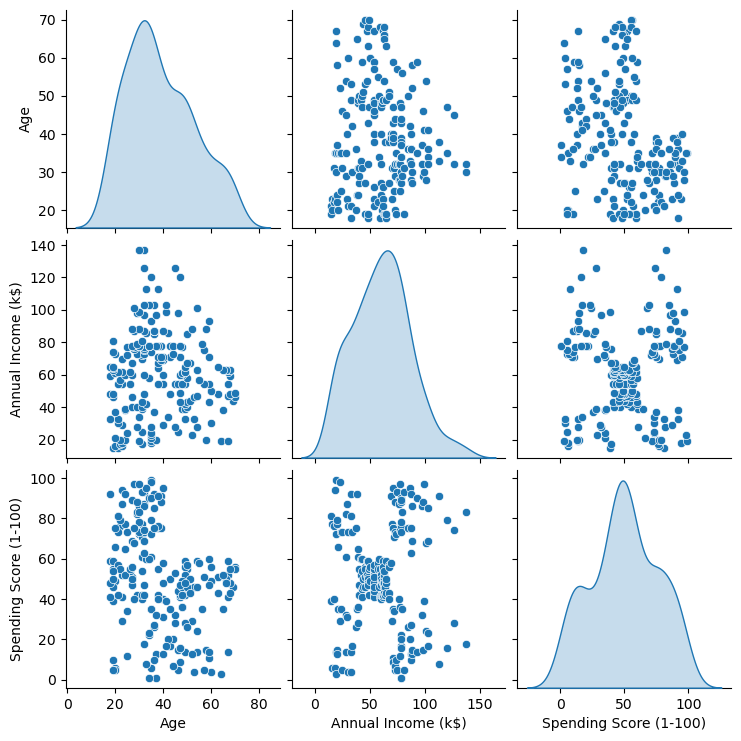

In [16]:
sns.pairplot(df_analise, diag_kind="kde");

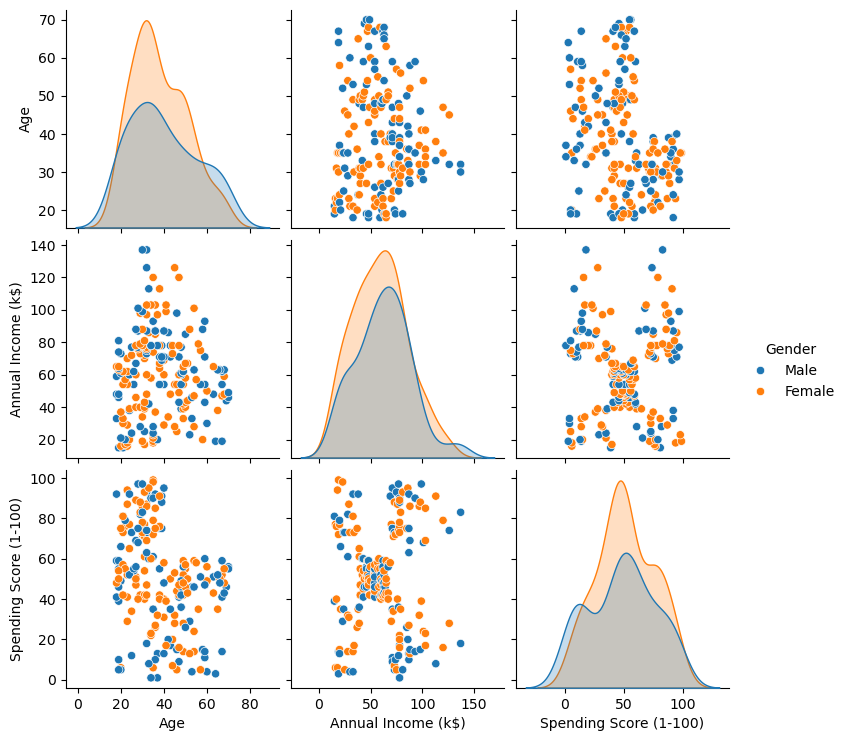

In [17]:
sns.pairplot(df_analise, diag_kind="kde", hue="Gender");

In [18]:
df_analise.to_csv("../dados/Mall_Customers_no_CustomerID.csv", index=False)

## Métodos Utilizados para Visualização de Dados

### Boxplot
Utilizamos o **boxplot** para identificar a distribuição dos dados e possíveis outliers. Ao segmentar por gênero, podemos visualizar as variações nos dados numéricos em relação ao gênero, o que ajuda a entender melhor as diferenças entre os grupos. 
[Seaborn - Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

### Matriz de Correlação
A **matriz de correlação** mostra a relação entre variáveis numéricas. Utilizamos o método de **Spearman** para medir correlações não paramétricas, permitindo identificar relações que não seguem necessariamente uma distribuição linear.
[Pandas - Corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

### Pairplot com Densidade de Kernel (KDE)
O **pairplot** exibe a relação entre todas as variáveis numéricas em pares. Utilizamos a **densidade de Kernel (KDE)** para fornecer uma estimativa suave das distribuições das variáveis. Com o argumento `hue`, conseguimos diferenciar as distribuições de acordo com o gênero, facilitando a identificação de padrões específicos.
[Seaborn - Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### Exportação do DataFrame
Exportamos os dados processados para um arquivo CSV, excluindo o índice. Isso é útil para armazenar e compartilhar os dados analisados.
[Pandas - to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

Esses gráficos e análises são fundamentais para interpretar os dados de maneira visual, permitindo a identificação de padrões, correlações e outliers que podem ser cruciais para tomar decisões informadas.
